In [3]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def linear_regression(X, y):
    return(np.linalg.inv(X.T @ X) @ X.T @ y)

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [30]:
data = pd.read_csv('Documents/MergedDataset.txt',)
df = data.drop(['Unnamed: 0'], axis=1)
dfF = df.replace({'F': 0, 'PF' : 1, 'NF': 1})
df = df.replace({'F': 0, 'PF' : 1, 'NF': 1})
print(df)

                country  year  covid_deaths_per_100k  excess_deaths_per_100k  \
0               Albania  2020              41.107801              206.781044   
1               Andorra  2020             108.591669              105.566617   
2   Antigua and Barbuda  2020               5.064419              -54.378239   
3             Argentina  2020              94.823418               91.739185   
4               Armenia  2020              95.110453              332.067863   
..                  ...   ...                    ...                     ...   
84               Turkey  2020              67.274440              104.379470   
85              Ukraine  2020              44.357970               96.807899   
86        United States  2020             110.091197              159.181026   
87              Uruguay  2020               5.193461              -65.092051   
88           Uzbekistan  2020               1.809301               52.191439   

    PR  CL  Status  HDI_2019  
0    3  

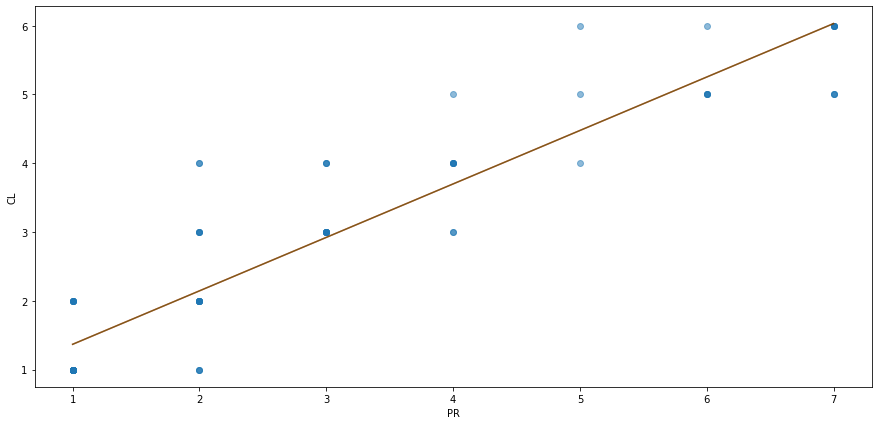

In [8]:
X = df["PR"].values
y = df["CL"].values

X_stacked = np.column_stack([X, np.ones_like(y)])
theta = linear_regression(X_stacked, y)

x_ = np.linspace(X.min(), X.max(), 100+1)
y_pred = x_ * theta[0] + theta[1]


reg = LinearRegression(fit_intercept=True).fit(X.reshape(-1, 1), y)
y_pred_sklearn = reg.predict(x_.reshape(-1, 1))


plt.figure(figsize=(15, 7))

plt.scatter(X, y, alpha=0.5)
plt.plot(x_ , y_pred, color='red', alpha=0.8)
plt.plot(x_ , y_pred_sklearn, color='green', alpha=0.5)
plt.xlabel('PR')
plt.ylabel('CL')
plt.show();

In [34]:
difference = df['excess_deaths_per_100k'].values - df['covid_deaths_per_100k'].values
df["difference"] = difference

sorted = df.sort_values("difference")
print(sorted)

                country  year  covid_deaths_per_100k  excess_deaths_per_100k  \
73           Seychelles  2020               0.000000             -167.382909   
87              Uruguay  2020               5.193461              -65.092051   
2   Antigua and Barbuda  2020               5.064419              -54.378239   
51             Malaysia  2020               1.437019              -42.429738   
50           Luxembourg  2020              77.975596               34.419944   
..                  ...   ...                    ...                     ...   
24              Ecuador  2020              57.059087              224.838784   
49            Lithuania  2020              72.048306              241.831830   
72               Serbia  2020              46.728924              233.787373   
4               Armenia  2020              95.110453              332.067863   
9               Belarus  2020              15.080166              261.066191   

    PR  CL  Status  HDI_2019  differenc

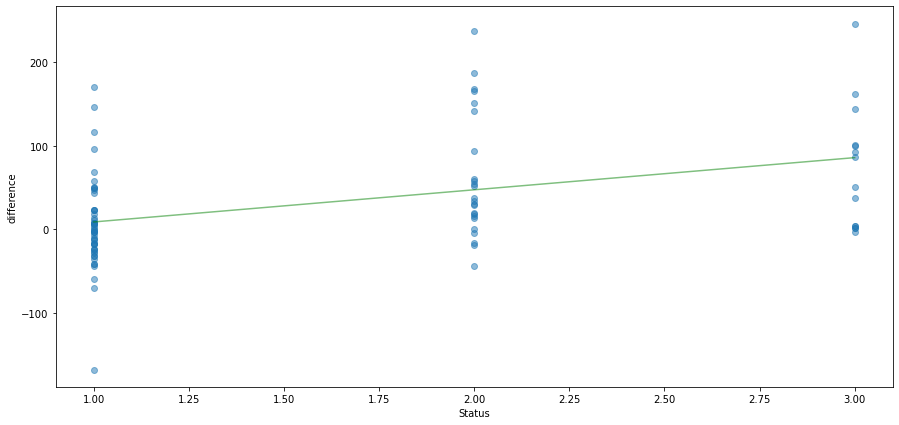

array([38.42965627])

In [10]:
X = df["Status"].values
y = df["difference"].values

x_ = np.linspace(X.min(), X.max(), 100+1)
y_pred = x_ * theta[0] + theta[1]

X_stacked = np.column_stack([X, np.ones_like(y)])

theta = linear_regression(X_stacked, y)

reg = LinearRegression(fit_intercept=True).fit(X.reshape(-1, 1), y)
y_pred_sklearn = reg.predict(x_.reshape(-1, 1))


plt.figure(figsize=(15, 7))

plt.scatter(X, y, alpha=0.5)
#plt.plot(x_ , y_pred, color='red', alpha=0.8)
plt.plot(x_ , y_pred_sklearn, color='green', alpha=0.5)
plt.xlabel('Status')
plt.ylabel('difference')
plt.show();

reg.coef_

In [11]:
Predictor = df.drop(["year", "country", "CL", "PR", "covid_deaths_per_100k", "excess_deaths_per_100k", "difference"], axis=1)
Predarray = Predictor.to_numpy()
print(Predarray)

[[2.    0.795]
 [1.    0.868]
 [1.    0.778]
 [1.    0.845]
 [2.    0.776]
 [1.    0.944]
 [1.    0.922]
 [3.    0.756]
 [1.    0.814]
 [3.    0.823]
 [1.    0.931]
 [1.    0.716]
 [2.    0.78 ]
 [1.    0.765]
 [1.    0.816]
 [1.    0.929]
 [1.    0.851]
 [2.    0.767]
 [1.    0.81 ]
 [1.    0.851]
 [3.    0.783]
 [1.    0.887]
 [1.    0.94 ]
 [2.    0.756]
 [2.    0.759]
 [3.    0.707]
 [2.    0.673]
 [1.    0.892]
 [1.    0.938]
 [1.    0.901]
 [2.    0.812]
 [1.    0.947]
 [1.    0.888]
 [2.    0.663]
 [2.    0.854]
 [1.    0.949]
 [2.    0.718]
 [1.    0.955]
 [1.    0.919]
 [1.    0.892]
 [1.    0.734]
 [1.    0.919]
 [3.    0.729]
 [3.    0.825]
 [2.    0.806]
 [3.    0.697]
 [1.    0.866]
 [2.    0.744]
 [1.    0.919]
 [1.    0.882]
 [1.    0.916]
 [2.    0.81 ]
 [2.    0.74 ]
 [1.    0.895]
 [1.    0.804]
 [2.    0.779]
 [1.    0.737]
 [2.    0.829]
 [1.    0.944]
 [1.    0.931]
 [3.    0.66 ]
 [2.    0.774]
 [1.    0.957]
 [3.    0.813]
 [1.    0.815]
 [2.    0.728]
 [2.    0.

In [12]:
y = df["difference"].values
X2 = sm.add_constant(Predarray)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     8.989
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           0.000285
Time:                        13:55:20   Log-Likelihood:                -494.75
No. Observations:                  89   AIC:                             995.5
Df Residuals:                      86   BIC:                             1003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.4185     95.641     -0.475      0.6

In [13]:
y = df["difference"].values
X2 = df["Status"].values
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.287
Model:                            OLS   Adj. R-squared (uncentered):              0.279
Method:                 Least Squares   F-statistic:                              35.40
Date:                Fri, 04 Feb 2022   Prob (F-statistic):                    5.35e-08
Time:                        13:55:55   Log-Likelihood:                         -496.51
No. Observations:                  89   AIC:                                      995.0
Df Residuals:                      88   BIC:                                      997.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [14]:
y = df["difference"].values
X2 = df["HDI_2019"].values
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.143
Method:                 Least Squares   F-statistic:                              15.91
Date:                Fri, 04 Feb 2022   Prob (F-statistic):                    0.000137
Time:                        13:56:06   Log-Likelihood:                         -504.16
No. Observations:                  89   AIC:                                      1010.
Df Residuals:                      88   BIC:                                      1013.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Replicate main findings of kwp paper then go to our analysis
 :)
 

In [15]:
y = df["Status"].values
X2 = df["HDI_2019"].values
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.767
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              289.2
Date:                Fri, 04 Feb 2022   Prob (F-statistic):                    1.48e-29
Time:                        13:56:09   Log-Likelihood:                         -111.39
No. Observations:                  89   AIC:                                      224.8
Df Residuals:                      88   BIC:                                      227.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<AxesSubplot:xlabel='Status', ylabel='HDI_2019'>

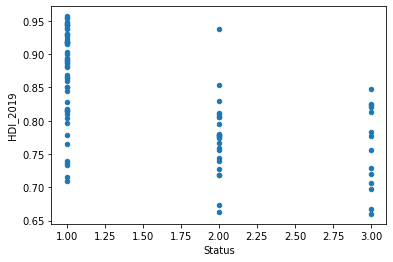

In [16]:
df.plot.scatter("Status", "HDI_2019")


In [28]:
y = dfF["excess_deaths_per_100k"].values
X2 = dfF["Status"].values
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.484
Model:                            OLS   Adj. R-squared (uncentered):              0.478
Method:                 Least Squares   F-statistic:                              82.59
Date:                Sat, 05 Feb 2022   Prob (F-statistic):                    2.71e-14
Time:                        14:23:59   Log-Likelihood:                         -525.03
No. Observations:                  89   AIC:                                      1052.
Df Residuals:                      88   BIC:                                      1055.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [71]:
PredictorF = dfF.drop(["year", "country", "CL", "PR", "covid_deaths_per_100k", "excess_deaths_per_100k"], axis=1)
PredarrayF = PredictorF.to_numpy()

y = df["excess_deaths_per_100k"].values
X2 = sm.add_constant(df["Status"].values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     6.240
Date:                Sun, 06 Feb 2022   Prob (F-statistic):             0.0144
Time:                        17:01:13   Log-Likelihood:                -524.90
No. Observations:                  89   AIC:                             1054.
Df Residuals:                      87   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.9346     12.482      4.962      0.0

In [48]:
y = df["covid_deaths_per_100k"].values
X2 = sm.add_constant(df["HDI_2019"].values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.292
Date:                Sat, 05 Feb 2022   Prob (F-statistic):             0.0413
Time:                        18:13:07   Log-Likelihood:                -469.09
No. Observations:                  89   AIC:                             942.2
Df Residuals:                      87   BIC:                             947.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.4754     51.123     -1.066      0.2

In [49]:
PredictorF = dfF.drop(["year", "country", "CL", "PR", "covid_deaths_per_100k", "excess_deaths_per_100k"], axis=1)
PredarrayF = PredictorF.to_numpy()

y = df["difference"].values
X2 = sm.add_constant(PredarrayF)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     10.14
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           0.000111
Time:                        01:17:42   Log-Likelihood:                -493.78
No. Observations:                  89   AIC:                             993.6
Df Residuals:                      86   BIC:                             1001.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.0205     90.638     -0.442      0.6

In [38]:
y = df["Status"].values
X2 = df["HDI_2019"].values
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.365
Model:                            OLS   Adj. R-squared (uncentered):              0.358
Method:                 Least Squares   F-statistic:                              50.60
Date:                Sat, 05 Feb 2022   Prob (F-statistic):                    2.88e-10
Time:                        14:52:01   Log-Likelihood:                         -68.199
No. Observations:                  89   AIC:                                      138.4
Df Residuals:                      88   BIC:                                      140.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [68]:
from sklearn import linear_model

y = df["difference"].values
X2 = sm.add_constant(PredarrayF)
reg = linear_model.BayesianRidge()
reg.fit(X2, y)
print(reg.sigma_)


[[2918.53692745    0.            0.        ]
 [   0.          190.63343884  218.20106245]
 [   0.          218.20106245 2268.13416839]]


[]
